# 📊 Marketing KPI Analysis & Model Interpretation with SHAP and Random Forest

**Author:** Sefer  
**Project Duration:** July 8 – July 22, 2025  
**Tools:** Python (`pandas`, `matplotlib`, `shap`, `scikit-learn`), Random Forest, Excel, Jupyter Notebook


## 🔵Load Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shap
import os
import shutil
from scipy.stats import rankdata

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



## 🔵Prepare Raw Data & Calculate KPIs

In [10]:
# Load CSV file
csv_path = "Marketing_KPI_Analysis_Model_Interpretation_with SHAP_and_Random_Forest/data/marketflash_marketing_data_2023_cleaned.csv"
df = pd.read_csv(csv_path)

# Calculate KPIs
df["ER"] = (df["Likes"] + df["Conversions"]) / df["Views"]
df["CTR"] = df["Clicks"] / df["Views"]
df["CPC"] = df["Expense"] / df["Clicks"]
df["CPA"] = df["Expense"] / df["Conversions"]

# Store the result in a new DataFrame for later use
df_kpi = df.copy()

# Output
print("✅ KPI DataFrame is ready and stored in variable 'df_kpi'")



✅ KPI DataFrame is ready and stored in variable 'df_kpi'


## 🔵Random Forest Model + SHAP | Output only in Notebook

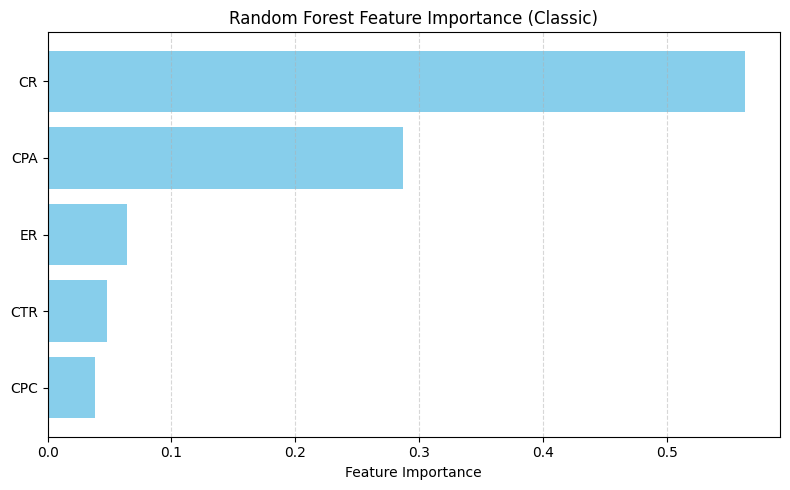


📊 Classic Feature Importances:


,Feature,Importance,Weight (normalized)
4,CR,0.563137,0.563137
0,CPA,0.286920,0.286920
3,ER,0.064179,0.064179
2,CTR,0.047738,0.047738
1,CPC,0.038027,0.038027



📈 Model Evaluation (Random Forest):
 - R² (explained variance):     0.8579
 - MAE (mean abs. error):       79.05
 - MSE (mean squared error):    11480.38
 - RMSE (root mean squared):    107.15


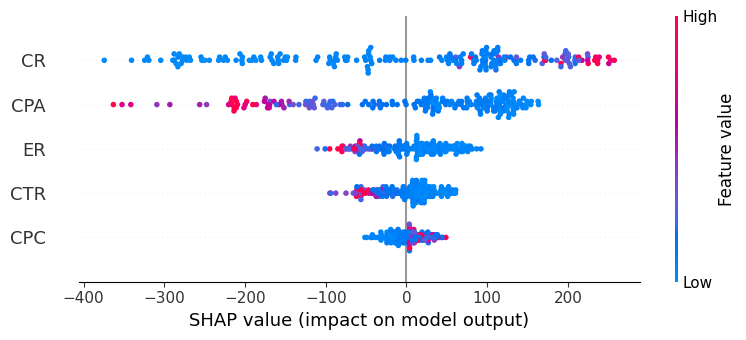

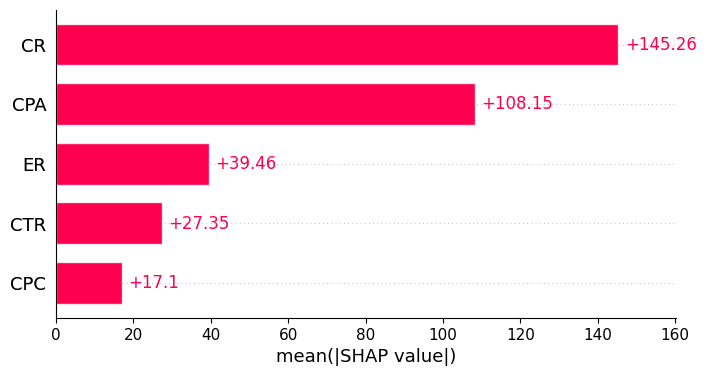


📌 SHAP Waterfall for campaign #2 with 920.96 predicted conversions


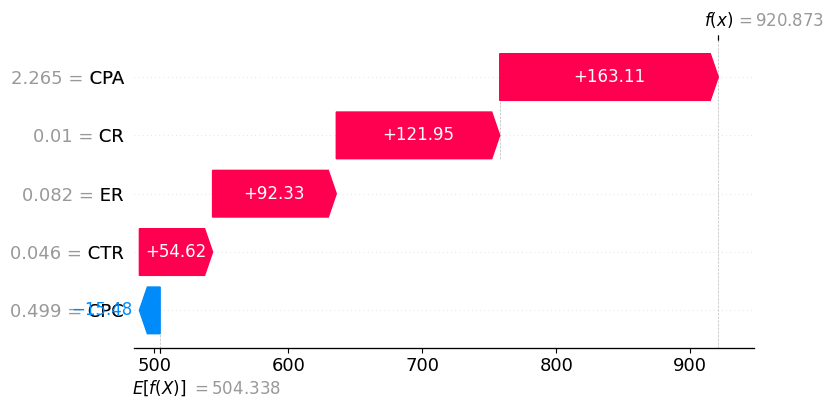


📈 SHAP-based Feature Importances (%):


,Feature,Mean_Absolute_SHAP,SHAP_%
4,CR,145.26,43.06
0,CPA,108.15,32.06
3,ER,39.46,11.70
2,CTR,27.35,8.11
1,CPC,17.10,5.07


In [11]:
# 1. Define features and target
X = df_kpi[['CPA', 'CPC', 'CTR', 'ER', 'CR']]
y = df_kpi['Conversions']

# 1. Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 3. Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# 4. Classic Feature Importance
importances = model.feature_importances_
feature_importance_df_kpi = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances,
    'Weight (normalized)': importances / importances.sum()
}).sort_values(by='Importance', ascending=False)

# 5. Bar chart
plt.figure(figsize=(8, 5))
plt.barh(feature_importance_df_kpi['Feature'], feature_importance_df_kpi['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance (Classic)')
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Show feature importance table
print("\n📊 Classic Feature Importances:")
display(feature_importance_df_kpi)

# 6. SHAP: Explain model
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test, check_additivity=False)

# 7. Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n📈 Model Evaluation (Random Forest):")
print(f" - R² (explained variance):     {r2:.4f}")
print(f" - MAE (mean abs. error):       {mae:.2f}")
print(f" - MSE (mean squared error):    {mse:.2f}")
print(f" - RMSE (root mean squared):    {rmse:.2f}")

# 8. SHAP Summary Plot (dot)
shap.summary_plot(shap_values.values, X_test, plot_type='dot')

# 9. SHAP Bar Plot
shap.plots.bar(shap_values, max_display=10)

# 10. SHAP Waterfall Plot for top prediction
top_index = np.argmax(y_pred)
print(f"\n📌 SHAP Waterfall for campaign #{top_index} with {y_pred[top_index]:.2f} predicted conversions")

shap.plots.waterfall(shap_values[top_index], max_display=5)

# 11. SHAP-based Feature Importance
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
shap_df_kpi = pd.DataFrame({
    'Feature': X.columns,
    'Mean_Absolute_SHAP': mean_abs_shap,
    'SHAP_%': 100 * mean_abs_shap / mean_abs_shap.sum()
}).sort_values('SHAP_%', ascending=False).round(2)

print("\n📈 SHAP-based Feature Importances (%):")
display(shap_df_kpi)

# Gewichte in ein Dictionary umwandeln
weights = dict(zip(shap_df_kpi["Feature"], shap_df_kpi["SHAP_%"] / 100))

## 🔵Calculate Performance Score (Normalization + KPI Weighting + Median Shift)

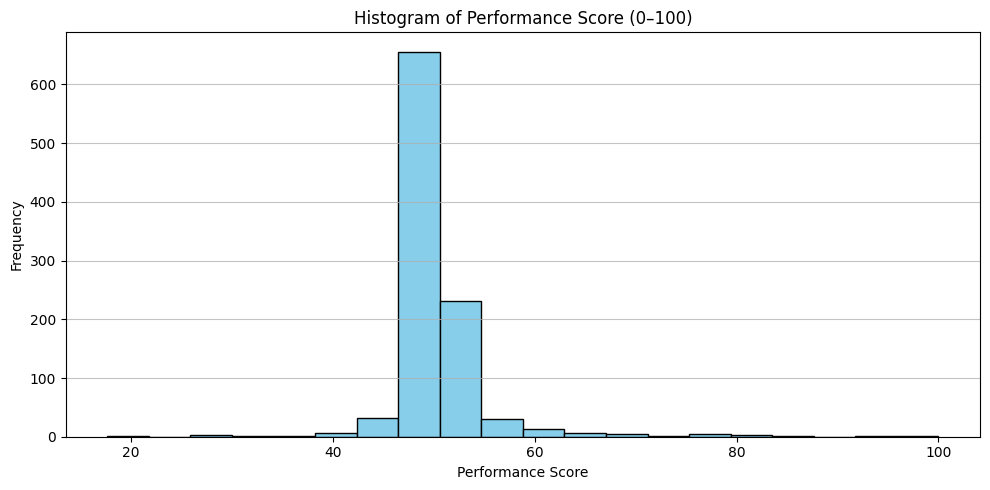

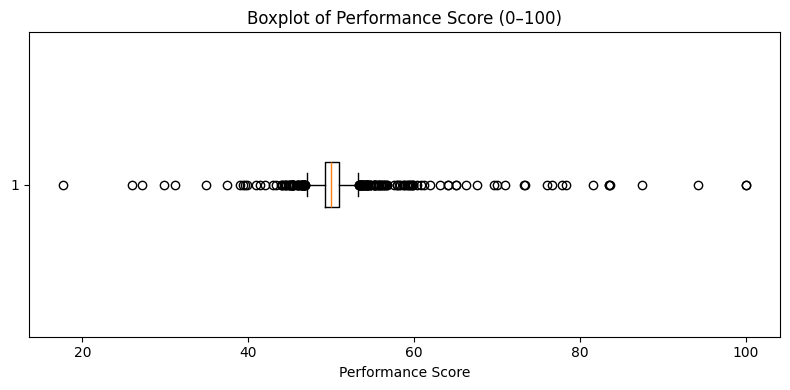

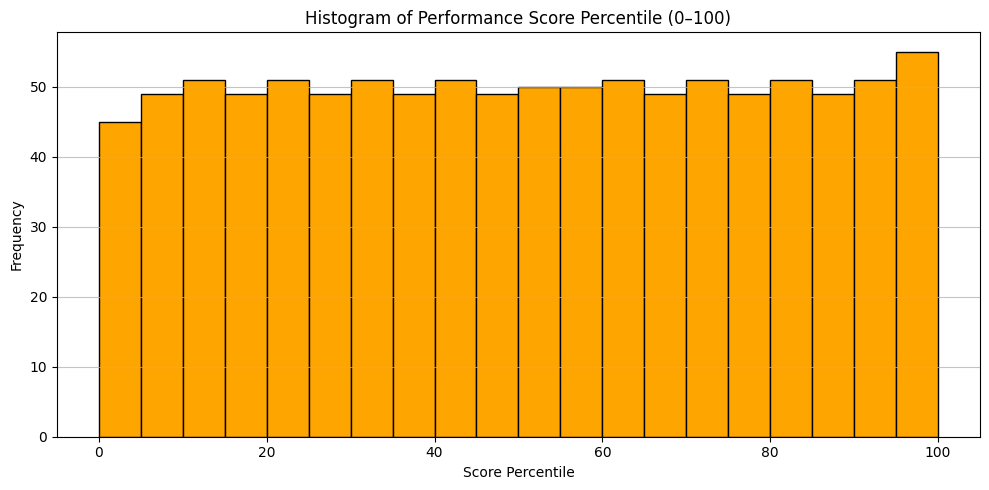

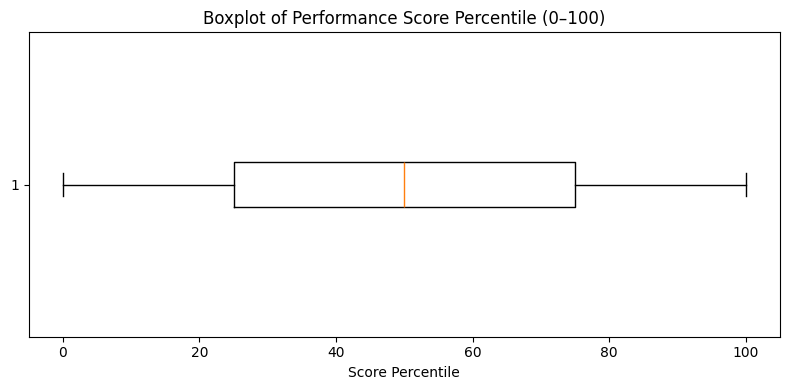

🎯 Performance Score (0–100):
Median = 50.0
Mean   = 50.7

📊 Score Percentile:
Median = 50.0
Mean   = 50.05

🔍 Sample values:
   Performance_Score_0_100  Score_Percentile
0                 51.94613                84
1                 47.82559                 8
2                 50.10487                55
3                 49.07574                19
4                 50.10034                54
✅ File successfully saved to:
Marketing_KPI_Analysis_Model_Interpretation_with SHAP_and_Random_Forest/output/metrics_Score.xlsx


In [12]:
# Min-Max Normalization
df_kpi["CTR_Norm"] = (df_kpi["CTR"] - df_kpi["CTR"].min()) / (df_kpi["CTR"].max() - df_kpi["CTR"].min())
df_kpi["CR_Norm"] = (df_kpi["CR"] - df_kpi["CR"].min()) / (df_kpi["CR"].max() - df_kpi["CR"].min())
df_kpi["ER_Norm"] = (df_kpi["ER"] - df_kpi["ER"].min()) / (df_kpi["ER"].max() - df_kpi["ER"].min())
df_kpi["CPC_Norm"] = (df_kpi["CPC"] - df_kpi["CPC"].min()) / (df_kpi["CPC"].max() - df_kpi["CPC"].min())
df_kpi["CPA_Norm"] = (df_kpi["CPA"] - df_kpi["CPA"].min()) / (df_kpi["CPA"].max() - df_kpi["CPA"].min())

# Dynamic performance index based on SHAP-derived weights
df_kpi["Performance_Index"] = (
    weights["CTR"] * df_kpi["CTR_Norm"] +
    weights["CR"] * df_kpi["CR_Norm"] +
    weights["ER"] * df_kpi["ER_Norm"] -
    weights["CPC"] * df_kpi["CPC_Norm"] -
    weights["CPA"] * df_kpi["CPA_Norm"]
) * 100

# Scale: shift median to 50, clip score to [0, 100]
campaign_median = df_kpi["Performance_Index"].median()
df_kpi["Performance_Score_0_100"] = (df_kpi["Performance_Index"] - campaign_median + 50).clip(0, 100)

# Percentile-based score (ranking all campaigns)
df_kpi["Score_Percentile"] = rankdata(df_kpi["Performance_Score_0_100"], method="average") / len(df_kpi) * 100
df_kpi["Score_Percentile"] = df_kpi["Score_Percentile"].round(0).astype(int)  # round to integer

# Round all numeric values to 5 decimals
df_kpi = df_kpi.round(5)

# Visualization function
def plot_distribution(data, column, title_prefix, xlabel, color):
    # Histogram
    plt.figure(figsize=(10, 5))
    plt.hist(data[column], bins=20, color=color, edgecolor='black')
    plt.title(f"Histogram of {title_prefix}")
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(8, 4))
    plt.boxplot(data[column], vert=False)
    plt.title(f"Boxplot of {title_prefix}")
    plt.xlabel(xlabel)
    plt.tight_layout()
    plt.show()

# Visualize both performance scores
plot_distribution(df_kpi, "Performance_Score_0_100", "Performance Score (0–100)", "Performance Score", "skyblue")
plot_distribution(df_kpi, "Score_Percentile", "Performance Score Percentile (0–100)", "Score Percentile", "orange")

# Final check: performance score distribution
print("🎯 Performance Score (0–100):")
print("Median =", round(df_kpi["Performance_Score_0_100"].median(), 2))
print("Mean   =", round(df_kpi["Performance_Score_0_100"].mean(), 2))

print("\n📊 Score Percentile:")
print("Median =", round(df_kpi["Score_Percentile"].median(), 2))
print("Mean   =", round(df_kpi["Score_Percentile"].mean(), 2))

print("\n🔍 Sample values:")
print(df_kpi[["Performance_Score_0_100", "Score_Percentile"]].head())

# Export final DataFrame to Excel
output_path = "Marketing_KPI_Analysis_Model_Interpretation_with SHAP_and_Random_Forest/output/metrics_Score.xlsx"
df_kpi.to_excel(output_path, index=False, engine='openpyxl')
print(f"✅ File successfully saved to:\n{output_path}")